In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("./optical_injection_locking.csv")
df.head()

,id,injection_ratio,detuning_frequency,emitted_light_beam_intensity,angle_with_main_beam,amplitude,affecting_parameter
0,369,-45.00328,0.02039,578.16,11.60,215.28,Temperature
1,56,-44.91711,-0.16249,578.95,12.66,215.73,Temperature
2,363,-44.88838,0.47361,578.45,11.70,214.93,Temperature
3,63,-44.85487,0.16749,576.82,12.53,215.59,Temperature
4,489,-44.79742,0.29074,578.45,12.81,215.63,Temperature


In [3]:
df['affecting_parameter'].value_counts()

affecting_parameter
Slave laser power     257
Temperature           255
Input power           255
Master laser power    255
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1022 non-null   int64  
 1   injection_ratio               1022 non-null   float64
 2   detuning_frequency            1022 non-null   float64
 3   emitted_light_beam_intensity  1022 non-null   float64
 4   angle_with_main_beam          1022 non-null   float64
 5   amplitude                     1022 non-null   float64
 6   affecting_parameter           1022 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 56.0+ KB


In [5]:
df.isnull().sum()

id                              0
injection_ratio                 0
detuning_frequency              0
emitted_light_beam_intensity    0
angle_with_main_beam            0
amplitude                       0
affecting_parameter             0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['affecting_parameter'] = le.fit_transform(df['affecting_parameter'])
df.head()

,id,injection_ratio,detuning_frequency,emitted_light_beam_intensity,angle_with_main_beam,amplitude,affecting_parameter
0,369,-45.00328,0.02039,578.16,11.60,215.28,3
1,56,-44.91711,-0.16249,578.95,12.66,215.73,3
2,363,-44.88838,0.47361,578.45,11.70,214.93,3
3,63,-44.85487,0.16749,576.82,12.53,215.59,3
4,489,-44.79742,0.29074,578.45,12.81,215.63,3


In [7]:
affecting_parameter_name = le.classes_
print(affecting_parameter_name)

['Input power' 'Master laser power' 'Slave laser power' 'Temperature']


In [8]:
X = df.drop(columns=['id', 'affecting_parameter'])
y = df['affecting_parameter']
X.head(3)

,injection_ratio,detuning_frequency,emitted_light_beam_intensity,angle_with_main_beam,amplitude
0,-45.00328,0.02039,578.16,11.60,215.28
1,-44.91711,-0.16249,578.95,12.66,215.73
2,-44.88838,0.47361,578.45,11.70,214.93


In [9]:
y.head(3)

0    3
1    3
2    3
Name: affecting_parameter, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [11]:
x_test

,injection_ratio,detuning_frequency,emitted_light_beam_intensity,angle_with_main_beam,amplitude
589,-29.55869,1.84322,578.87,10.56,215.64
743,-26.46116,-2.24175,578.24,10.97,215.83
877,-23.95727,-2.87785,577.24,11.80,215.83
160,-40.58439,0.54716,578.84,11.31,215.59
399,-34.09728,-1.11664,578.21,12.01,215.31
...,...,...,...,...,...
736,-26.63829,1.89292,577.41,12.84,215.78
402,-33.94886,-1.14050,578.21,11.95,214.98
150,-40.84770,-0.15056,578.24,1.56,214.98
249,-37.92730,-0.83437,577.94,8.26,215.28


In [12]:
x_train.shape

(715, 5)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])
print(x_test[:1])

     injection_ratio  detuning_frequency  emitted_light_beam_intensity  \
544        -30.61674            -1.43469                        578.87   

     angle_with_main_beam  amplitude  
544                 10.57     215.59  
[[ 0.22041463 -0.66982234  0.70757054  0.06289001  0.37651904]]
[[0.37471455 1.09256013 0.70757054 0.05999176 0.54805665]]


In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes=4)
print(y_train[:5])

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 1380 (5.39 KB)
Trainable params: 1380 (5.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
23/23 - 0s - loss: 1.3732 - accuracy: 0.3021 - 475ms/epoch - 21ms/step
Epoch 2/100
23/23 - 0s - loss: 1.2899 - accuracy: 0.3860 - 19ms/epoch - 835us/step
Epoch 3/100
23/23 - 0s - loss: 1.1859 - accuracy: 0.4713 - 19ms/epoch - 838us/step
Epoch 4/100
23/23 - 0s - loss: 1.0846 - accuracy: 0.5007 - 20ms/epoch - 870us/step
Epoch 5/100
23/23 - 0s - loss: 0.9992 - accuracy: 0.5734 - 21ms/epoch - 913us/step
Epoch 6/100
23/23 - 0s - loss: 0.9171 - accuracy: 0.5944 - 19ms/epoch - 826us/step
Epoch 7/100
23/23 - 0s - loss: 0.8408 - accuracy: 0.6182 - 19ms/epoch - 826us/step
Epoch 8/100
23/23 - 0s - loss: 0.7739 - accuracy: 0.6434 - 19ms/epoch - 826us/step
Epoch 9/100
23/23 - 0s - loss: 0.7152 - accuracy: 0.7049 - 20ms/epoch - 870us/step
Epoch 10/100
23/23 - 0s - loss: 0.6728 - accuracy: 0.7147 - 20ms/epoch - 870us/step
Epoch 11/100
23/23 - 0s - loss: 0.6608 - accuracy: 0.7329 - 19ms/epoch - 826us/step
Epoch 12/100
23/23 - 0s - loss: 0.6305 - accuracy: 0.7231 - 20ms/epoch - 870us/step
E

In [19]:
x_test

array([[ 3.74714555e-01,  1.09256013e+00,  7.07570537e-01,
         5.99917603e-02,  5.48056647e-01],
       [ 8.26440517e-01, -1.10374163e+00, -1.20954115e-01,
         1.78820034e-01,  1.19989954e+00],
       [ 1.19159344e+00, -1.44574354e+00, -1.43607261e+00,
         4.19374833e-01,  1.19989954e+00],
       ...,
       [-1.27160975e+00,  2.05957021e-02, -1.20954115e-01,
        -2.54843376e+00, -1.71623973e+00],
       [-8.45715404e-01, -3.47057696e-01, -5.15489664e-01,
        -6.06605874e-01, -6.87014102e-01],
       [ 1.18491653e-03, -7.09366811e-01,  6.54965797e-01,
         4.07781830e-01, -8.63685839e-04]])

In [20]:
prediction = model.predict(x_test)

10/10 [==============================] - 0s 879us/step


In [21]:
import numpy
numpy.array(x_test[0])

array([0.37471455, 1.09256013, 0.70757054, 0.05999176, 0.54805665])

In [71]:
data1 = 0.37471455
data2 = 1.09256013
data3 = 0.70757054
data4 = 0.05999176
data5 = 0.54805665

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from keras.models import load_model
df = pd.read_csv("./optical_injection_locking.csv")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
le = LabelEncoder()
df['affecting_parameter'] = le.fit_transform(df['affecting_parameter'])
X = df.drop(columns=['id', 'affecting_parameter'])
y = df['affecting_parameter']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)
x_train = sc.fit_transform(x_train)
model = load_model('optical_injection_locking_model.h5')
affecting_parameter_name = le.classes_


# Initialize an empty list to store the captured values
captured_values = []

# Define a while loop that continues indefinitely
while True:
    # Prompt the user for input
    message = input("Enter a value (or type 'done' to finish): ")

    # Check if the user wants to exit the loop
    if message.lower() == 'done':
        break  # Exit the loop if the user types 'done'

    # Convert the input value to the appropriate data type and append it to the list
    try:
        value = float(message)  # Convert input to float
        captured_values.append(value)
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Ensure that exactly four values were captured
if len(captured_values) == 5:  # Check if exactly five values were captured
    # Assign the captured values to data1, data2, data3, and data4
    data1, data2, data3, data4, data5 = captured_values
    X_new = np.array([[data1 , data2, data3, data4 ,data5]])
    x_test = sc.transform(X_new)
    prediction = model.predict(x_test)
    prediction = np.argmax(prediction, axis=-1)
    print(affecting_parameter_name[prediction[:1][0]])
    # x1_test = sc.transform([[data1, data2, data3, data4, data5]])
    
    # Use the model to make predictions
    # pred = model.predict([[data1, data2, data3, data4, data5]])
    # pred_name = np.argmax(pred, axis=-1)
    
    # Print the predictions
    # print([[data1, data2, data3, data4, data5]].shape())
    # print("Predictions:", pred_name)
else:
    print("Please enter exactly five values.")


1/1 [==============================] - 0s 36ms/step
Slave laser power


C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
model.save('optical_injection_locking_model.h5', model)

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
x_test = sc.transform(X_new)
x_test

C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.92230755,  0.88910098, -1.05468825, -0.09071727,  0.37651904]])

In [86]:
prediction = model.predict(x_test)
print(prediction[:10])
prediction = np.argmax(prediction, axis=-1)
print(affecting_parameter_name[prediction[:1][0]])

1/1 [==============================] - 0s 16ms/step
[[8.9910305e-01 6.4823467e-09 1.0121562e-19 1.0089696e-01]]
Input power


In [30]:
x_test[2]

array([ 1.19159344, -1.44574354, -1.43607261,  0.41937483,  1.19989954])

In [62]:
prediction = np.argmax(prediction, axis=-1)
print(affecting_parameter_name[prediction[:1][0]])

Input power


In [21]:
print(y_test[:5])

589    1
743    1
877    2
160    3
399    0
Name: affecting_parameter, dtype: int32


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9804560260586319


In [23]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[72  4  0  0]
 [ 1 74  0  0]
 [ 0  1 80  0]
 [ 0  0  0 75]]


Text(50.72222222222221, 0.5, 'actual')

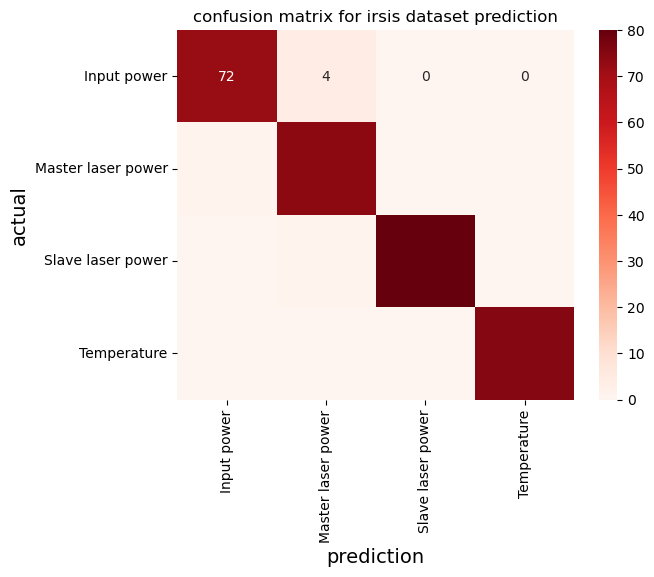

In [25]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=affecting_parameter_name, yticklabels=affecting_parameter_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)